In [1]:
#Question 3
#classification->supervised learning
#import packages
import pandas as pd #data processing and csv file
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.model_selection import GridSearchCV #for tuning hyperparameter k in KNN
from sklearn.model_selection import StratifiedKFold #for KNN
from sklearn.preprocessing import StandardScaler
loan_df=pd.read_csv('loan.data.sample.csv')
loan_df.info()
loan_df.head()
#print(loan_df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_EDUCATION_TYPE  307511 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 28.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [3]:
#drop the missing values 
loan_df=loan_df.dropna()
loan_df.isna().sum() # check for missing values for surety

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_EDUCATION_TYPE    0
dtype: int64

In [5]:
#DATA CLEANING AND PREPROCESSING

#encode categorical variables so they are numeric input for logistic regression
loan_df['CODE_GENDER'] = loan_df['CODE_GENDER'].map({'F': 0, 'M': 1})
loan_df['FLAG_OWN_CAR'] = loan_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
loan_df['FLAG_OWN_REALTY'] = loan_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
loan_df = pd.get_dummies(loan_df, columns=['NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE'], drop_first=True)
# all bool columns to int
loan_df = loan_df.astype({col: 'int' for col in loan_df.columns if loan_df[col].dtype == 'bool'})
loan_df.head()


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,100002,1,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,1
1,100003,0,0.0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,1,0,0,0
2,100004,0,1.0,1,1,0,67500.0,135000.0,6750.0,135000.0,1,0,0,0,1
3,100006,0,0.0,0,1,0,135000.0,312682.5,29686.5,297000.0,0,0,0,0,1
4,100007,0,1.0,0,1,0,121500.0,513000.0,21865.5,513000.0,0,0,0,0,1


In [7]:
#split feature and target variables
train_features=loan_df.drop('TARGET', axis=1)
train_target=loan_df.TARGET

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)


X_train.isna().sum() #missing values in X_train set
#remove the missing values in the training and test set
X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_test = X_test.dropna()
y_test = y_test[X_test.index]


Logistic Regression Performance:
Accuracy     : 0.5469
Precision    : 0.1084
Recall       : 0.6193
F1 Score     : 0.1845
Cohen's Kappa: 0.0508
AUC-ROC      : 0.6174

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     56357
           1       0.11      0.62      0.18      5086

    accuracy                           0.55     61443
   macro avg       0.52      0.58      0.44     61443
weighted avg       0.87      0.55      0.64     61443



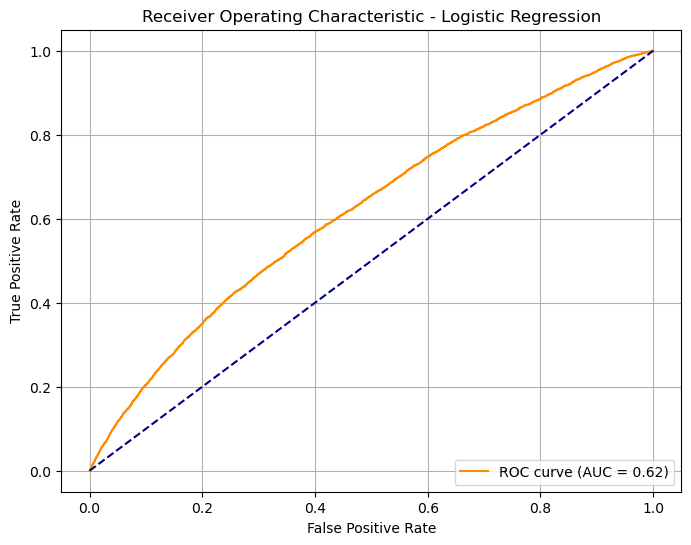

In [11]:
#implement standard scaler always after splitting the data into training and testing sets
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
LR_model=LogisticRegression(random_state=42, class_weight='balanced') #tune hyperparameter 'class_weight' as dataset is imbalanced
#train model with scaled data
LR_model.fit(X_train_scaled, y_train)
LR_y_pred = LR_model.predict(X_test_scaled)
#extract the probs of the positive class for ROC AUC curve
pos_class_prob=LR_model.predict_proba(X_test_scaled)[:, 1] #probabilities for positive class predictions

#print results and performance metrics
accuracy=accuracy_score(y_test,LR_y_pred)
precision=precision_score(y_test,LR_y_pred)
recall=recall_score(y_test,LR_y_pred)
f1=f1_score(y_test,LR_y_pred)
c_kappa=cohen_kappa_score(y_test,LR_y_pred)
roc_auc=roc_auc_score(y_test,pos_class_prob)

print("Logistic Regression Performance:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"Cohen's Kappa: {c_kappa:.4f}")
print(f"AUC-ROC      : {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, LR_y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pos_class_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()
